<a href="https://colab.research.google.com/github/stpaul2coderdojo/jetson-dlinano/blob/master/workshopon_july52025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q jetson-emulator


In [2]:
!pip install -q jetson-emulator

In [22]:
import os
os.makedirs('dataset/thumbs_down', exist_ok=True)

In [23]:
import os
os.makedirs('dataset/thumbs_up', exist_ok=True)

In [24]:
import torchvision.transforms as transforms
from dataset import ImageClassificationDataset

TASK = 'thumbs'
# TASK = 'emotions'
# TASK = 'fingers'
# TASK = 'diy'

CATEGORIES = ['thumbs_up', 'thumbs_down']
# CATEGORIES = ['none', 'happy', 'sad', 'angry']
# CATEGORIES = ['1', '2', '3', '4', '5']
# CATEGORIES = [ 'diy_1', 'diy_2', 'diy_3']

DATASETS = ['A', 'B']
# DATASETS = ['A', 'B', 'C']

TRANSFORMS = transforms.Compose([
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.2),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

datasets = {}
for name in DATASETS:
    datasets[name] = ImageClassificationDataset(TASK + '_' + name, CATEGORIES, TRANSFORMS)

print("{} task with {} categories defined".format(TASK, CATEGORIES))

total_samples = 0
for name in DATASETS:
    total_samples += len(datasets[name])
print("Total samples loaded: {}".format(total_samples))

ImportError: cannot import name 'ImageClassificationDataset' from 'dataset' (unknown location)

In [17]:
import torch
import torch.utils.data as data
import os
import PIL.Image
import glob

class ImageClassificationDataset(data.Dataset):
    def __init__(self, task, categories, transforms=None):
        self.task = task
        self.categories = categories
        self.transforms = transforms
        # Modified to directly use the dataset directory and the task/category structure
        self.root = os.path.join('dataset', self.task)
        self.annotations = {}
        for category in self.categories:
            self.annotations[category] = [os.path.basename(x) for x in glob.glob(os.path.join(self.root, category, '*.jpg'))]

    def __len__(self):
        length = 0
        for category in self.categories:
            length += len(self.annotations[category])
        return length

    def __getitem__(self, idx):
        category_idx = 0
        for category in self.categories:
            if idx < len(self.annotations[category]):
                image_path = os.path.join(self.root, category, self.annotations[category][idx])
                image = PIL.Image.open(image_path)
                if self.transforms is not None:
                    image = self.transforms(image)
                return image, category_idx
            else:
                idx -= len(self.annotations[category])
                category_idx += 1

    def get_category_index(self, category):
        return self.categories.index(category)

In [28]:
!unzip "/content/Photos-1-001.zip" -d dataset/thumbs_down/

Archive:  /content/Photos-1-001.zip
  inflating: dataset/thumbs_down/IMG_20250704_191425.jpg  
  inflating: dataset/thumbs_down/IMG_20250704_191413.jpg  
  inflating: dataset/thumbs_down/IMG_20250704_191408.jpg  
  inflating: dataset/thumbs_down/IMG_20250704_191429.jpg  
  inflating: dataset/thumbs_down/IMG_20250704_191432.jpg  
  inflating: dataset/thumbs_down/IMG_20250704_191434.jpg  
  inflating: dataset/thumbs_down/IMG_20250704_191411.jpg  
  inflating: dataset/thumbs_down/IMG_20250704_191416.jpg  
  inflating: dataset/thumbs_down/IMG_20250704_191406.jpg  
  inflating: dataset/thumbs_down/IMG_20250704_191428.jpg  
  inflating: dataset/thumbs_down/IMG_20250704_191420.jpg  
  inflating: dataset/thumbs_down/IMG_20250704_191419.jpg  
  inflating: dataset/thumbs_down/IMG_20250704_191424.jpg  


In [20]:
import os
os.makedirs('dataset/thumbs_down', exist_ok=True)

In [21]:
import os
os.makedirs('dataset/thumbs_up', exist_ok=True)

In [9]:
!unzip "/content/Photos-1-001 (1).zip" -d dataset/thumbs_up/

Archive:  /content/Photos-1-001 (1).zip
  inflating: dataset/thumbs_up/IMG_20250704_191354.jpg  
  inflating: dataset/thumbs_up/IMG_20250704_191320.jpg  
  inflating: dataset/thumbs_up/IMG_20250704_191332.jpg  
  inflating: dataset/thumbs_up/IMG_20250704_191338.jpg  
  inflating: dataset/thumbs_up/IMG_20250704_191358.jpg  
  inflating: dataset/thumbs_up/IMG_20250704_191317.jpg  
  inflating: dataset/thumbs_up/IMG_20250704_191312.jpg  
  inflating: dataset/thumbs_up/IMG_20250704_191324.jpg  
  inflating: dataset/thumbs_up/IMG_20250704_191308.jpg  
  inflating: dataset/thumbs_up/IMG_20250704_191326.jpg  
  inflating: dataset/thumbs_up/IMG_20250704_191349.jpg  
  inflating: dataset/thumbs_up/IMG_20250704_191346.jpg  
  inflating: dataset/thumbs_up/IMG_20250704_191341.jpg  
  inflating: dataset/thumbs_up/IMG_20250704_191400.jpg  
  inflating: dataset/thumbs_up/IMG_20250704_191344.jpg  
  inflating: dataset/thumbs_up/IMG_20250704_191351.jpg  
  inflating: dataset/thumbs_up/IMG_20250704_1913

In [29]:
import torch
import torchvision
import ipywidgets


device = torch.device('cuda')

# ALEXNET
# model = torchvision.models.alexnet(pretrained=True)
# model.classifier[-1] = torch.nn.Linear(4096, len(datasets[DATASETS[0]].categories))

# SQUEEZENET
# model = torchvision.models.squeezenet1_1(pretrained=True)
# model.classifier[1] = torch.nn.Conv2d(512, len(datasets[DATASETS[0]].categories), kernel_size=1)
# model.num_classes = len(datasets[DATASETS[0]].categories)

# RESNET 18
model = torchvision.models.resnet18(pretrained=True)
model.fc = torch.nn.Linear(512, len(datasets[DATASETS[0]].categories))

# RESNET 34
# model = torchvision.models.resnet34(pretrained=True)
# model.fc = torch.nn.Linear(512, len(datasets[DATASETS[0]].categories))

model = model.to(device)

model_save_button = ipywidgets.Button(description='save model')
model_load_button = ipywidgets.Button(description='load model')
model_path_widget = ipywidgets.Text(description='model path', value='my_model.pth')

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


NameError: name 'datasets' is not defined

In [13]:
def load_model(c):
    model.load_state_dict(torch.load(model_path_widget.value))
model_load_button.on_click(load_model)

def save_model(c):
    torch.save(model.state_dict(), model_path_widget.value)
model_save_button.on_click(save_model)

model_widget = ipywidgets.VBox([
    model_path_widget,
    ipywidgets.HBox([model_load_button, model_save_button])
])

# display(model_widget)
print("model configured and model_widget created")

NameError: name 'model_load_button' is not defined

In [25]:
!pip install -q torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.0 MB/s eta 0:00:00


In [26]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision import models
from torch import nn
from torch.optim import Adam
from tqdm.notebook import tqdm

In [30]:
data_dir = 'dataset'  # <-- Upload your dataset folder to this path
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
dataset = ImageFolder(data_dir, transform=transform)
class_names = dataset.classes
print("Classes:", class_names)
train_loader = DataLoader(dataset, batch_size=8, shuffle=True)

Classes: ['thumbs_down', 'thumbs_up']


In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(class_names))
model = model.to(device)
optimizer = Adam(model.parameters(), lr=1e-4)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [32]:
def train_model(epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in tqdm(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = F.cross_entropy(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100*correct/total:.2f}%")

In [33]:
train_model(epochs=5)

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 1, Loss: 0.5229, Accuracy: 63.33%


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 2, Loss: 0.0980, Accuracy: 96.67%


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 3, Loss: 0.0317, Accuracy: 100.00%


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 4, Loss: 0.2317, Accuracy: 93.33%


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 5, Loss: 0.0218, Accuracy: 100.00%


In [34]:
torch.save(model.state_dict(), "resnet_thumbs_model.pth")
print("Model saved as resnet_thumbs_model.pth")

Model saved as resnet_thumbs_model.pth


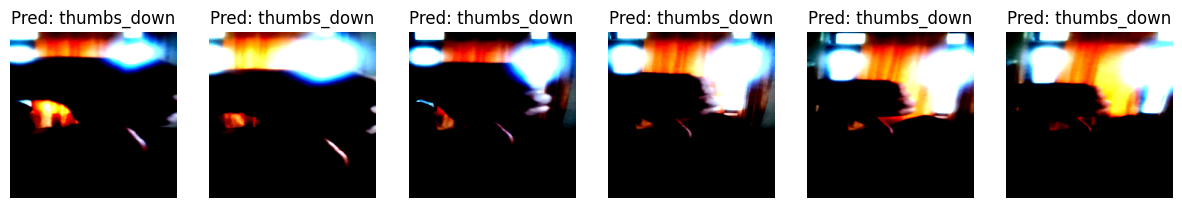

In [35]:
def visualize_predictions(num_images=6):
    model.eval()
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    with torch.no_grad():
        for i in range(num_images):
            image, label = dataset[i]
            input_tensor = image.unsqueeze(0).to(device)
            output = model(input_tensor)
            pred = output.argmax(dim=1).item()
            axes[i].imshow(image.permute(1, 2, 0).numpy())
            axes[i].set_title(f"Pred: {class_names[pred]}")
            axes[i].axis("off")
visualize_predictions()